In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# nan and align

In [76]:
df_old = pd.read_csv("../../data/results/ppg_features_pulsedb_test5_all.csv")
df_new = pd.read_csv("../../data/results/ppg_features_pulsedb_test4_all.csv")

In [164]:
df_old =pd.read_csv("../../data/results/ppg_features_pulsedb_train_all.csv")
df_new = pd.read_csv("../../data/results/ppg_features_pulsedb_train3_all.csv")

In [67]:
df_old.columns.tolist()

['Unnamed: 0',
 'Tc',
 'Ts',
 'Td',
 'Tsteepest',
 'Steepest',
 'TNegSteepest',
 'NegSteepest',
 'TdiaRise',
 'DiaRise',
 'SteepDiaRise',
 'TSystoDiaRise',
 'TdiaToEnd',
 'Ratio',
 'Ts_norm',
 'Td_norm',
 'Tsteepest_norm',
 'TNegSteepest_norm',
 'TdiaRise_norm',
 'TSystoDiaRise_norm',
 'TdiaToEnd_norm',
 'SW25',
 'SW25_norm',
 'DW25',
 'DW25_norm',
 'SWaddDW25',
 'SWaddDW25_norm',
 'DWdivSW25',
 'SW50',
 'SW50_norm',
 'DW50',
 'DW50_norm',
 'SWaddDW50',
 'SWaddDW50_norm',
 'DWdivSW50',
 'SW75',
 'SW75_norm',
 'DW75',
 'DW75_norm',
 'SWaddDW75',
 'SWaddDW75_norm',
 'DWdivSW75',
 'S1',
 'S2',
 'S3',
 'S4',
 'AUCsys',
 'AUCdia',
 'S1_norm',
 'S2_norm',
 'S3_norm',
 'S4_norm',
 'AUCsys_norm',
 'AUCdia_norm',
 'SQI_skew',
 'SQI_kurtosis',
 'apg_a',
 'apg_b',
 'apg_c',
 'apg_d',
 'apg_e',
 'ppg_a',
 'ppg_b',
 'ppg_c',
 'ppg_d',
 'ppg_e',
 'ratio_apg_b',
 'ratio_apg_c',
 'ratio_apg_d',
 'ratio_apg_e',
 'ratio_ppg_b',
 'ratio_ppg_c',
 'ratio_ppg_d',
 'ratio_ppg_e',
 'T_a',
 'T_b',
 'T_c',
 'T_

In [68]:
cycle_old = df_old['n_cycle'].sum()
cycle_new = df_new['n_cycle'].sum()
align_old = df_old['n_abcde'].sum()
align_new = df_new['n_abcde'].sum()
nan_old = df_old['n_nan_cycle'].sum()
nan_new = df_new['n_nan_cycle'].sum()
align_rate_old = align_old / cycle_old * 100
align_rate_new = align_new / cycle_new * 100
nan_rate_old = nan_old / cycle_old * 100
nan_rate_new = nan_new / cycle_new * 100
print(f"Old: cycle={cycle_old}, align={align_old} ({align_rate_old:.2f}%), nan={nan_old} ({nan_rate_old:.2f}%)")
print(f"New: cycle={cycle_new}, align={align_new} ({align_rate_new:.2f}%), nan={nan_new} ({nan_rate_new:.2f}%)")

Old: cycle=1083315.0, align=1118.0 (0.10%), nan=0.0 (0.00%)
New: cycle=1238006.0, align=6131.0 (0.50%), nan=86517.0 (6.99%)


In [ ]:
align_cols = ['T_b', 'T_c', 'T_d', 'T_e']
count_old = (df_old[align_cols] <= 0).any(axis=1).sum()
count_new = (df_new[align_cols] <= 0).any(axis=1).sum()
nan_cols = ['apg_a', 'apg_b', 'apg_c', 'apg_d', 'apg_e']
nan_count_old = df_old[nan_cols].isna().any(axis=1).sum()
nan_count_new = df_new[nan_cols].isna().any(axis=1).sum()
print(f"Old: {count_old} signals with negative alignment points")
print(f"New: {count_new} signals with negative alignment points")
print(f"Old: {nan_count_old} signals with NaN alignment points")
print(f"New: {nan_count_new} signals with NaN alignment points")


Old: 1727 signals with negative alignment points
New: 2030 signals with negative alignment points
Old: 0 signals with NaN alignment points
New: 10518 signals with NaN alignment points


In [82]:
df_old["class"] = "old"
df_new["class"] = "new"
df_all = pd.concat([df_old,df_new])
df_all.shape

(193185, 107)

In [ ]:
df_all.dropna(subset=['T_c_norm']).shape

(101363, 104)

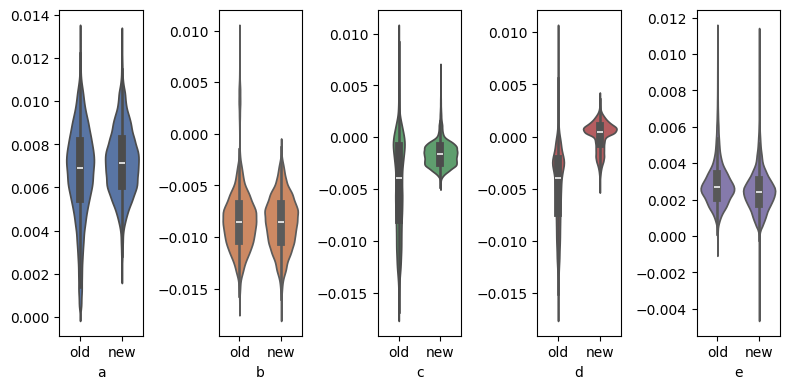

In [110]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(8,4))
color_pallet = sns.color_palette("deep")
cols = ["a","b","c","d","e"]
# ['T_a_norm','T_b_norm', 'T_c_norm', 'T_d_norm', 'T_e_norm']
for i, col in enumerate(['apg_a','apg_b', 'apg_c', 'apg_d', 'apg_e']):
    sns.violinplot(x='class', y=col, data=df_all.dropna(subset=[col]),ax=ax[i],color=color_pallet[i])
    # hide ylabel
    ax[i].set_ylabel('')
    ax[i].set_xlabel(cols[i])
plt.tight_layout()  

In [74]:
len(df_old),len(df_new)

(730808, 835927)

In [71]:
102896-1534

101362

In [44]:
(df_old[align_cols] <= 0).sum(),(df_new[align_cols] <= 0).sum()

(T_b    1700
 T_c    2107
 T_d    1700
 T_e    1700
 dtype: int64,
 T_b      0
 T_c    203
 T_d     27
 T_e      0
 dtype: int64)

In [ ]:
idx = np.where(df_old['T_b'] <= 0)[0]
ppg = np.load("../../data/processed/BP_npy/PulseDB/test.npy",mmap_mode='r')[:,1]

(1250,)


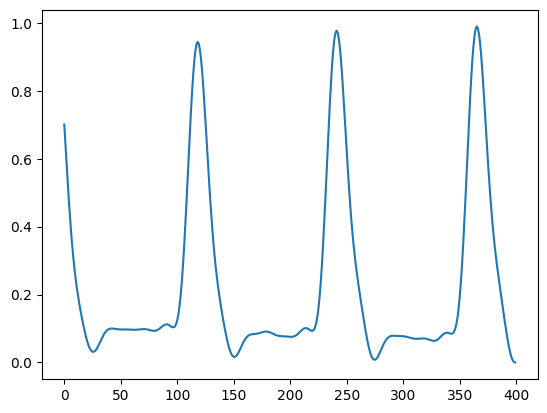

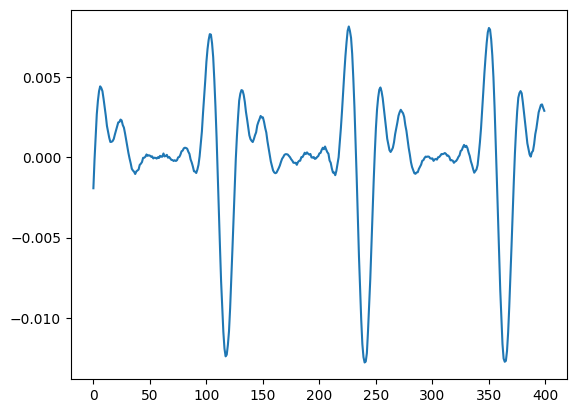

In [17]:
random_idx = idx[0]
target = ppg[df_old.loc[random_idx,'signal_index']]
print(target.shape)
plt.plot(target[200:600])
apg = np.diff(np.diff(target))
plt.figure()
plt.plot(apg[199:599])

# fix data

In [38]:

df = pd.read_parquet(r"F:\minowa\BloodPressureEstimation\data\processed\PulseDB\ppg_features_pulsedb_test3_all.parquet")
# df = df[df['T_b'] > 0]
df.to_parquet(r"F:\minowa\BloodPressureEstimation\data\processed\PulseDB\ppg_features_pulsedb_test3_2_all.parquet")

In [35]:
df = pd.read_parquet(r"F:\minowa\BloodPressureEstimation\data\processed\PulseDB\Downsampled\train_features3.parquet")
# df = df[df['T_b'] > 0]
df.to_parquet(r"F:\minowa\BloodPressureEstimation\data\processed\PulseDB\Downsampled\train_features3_2.parquet")

In [29]:
df = pd.read_parquet(r"F:\minowa\BloodPressureEstimation\data\processed\PulseDB\Downsampled\train_features.parquet")

In [39]:
(df[align_cols] <= 0).sum()

T_b      0
T_c    203
T_d     27
T_e      0
dtype: int64

patients

In [46]:
def add_bp_class(df, sbp_col="sbp", dbp_col="dbp", new_col="bp_class"):
    """
    Add blood pressure class column based on SBP and DBP values.
    
    Categories:
        0: sbp < 120 and dbp < 80
        1: 120 <= sbp < 140 or 80 <= dbp < 90
        2: sbp >= 140 or dbp >= 90
    """
    
    conditions = [
        (df[sbp_col] < 120) & (df[dbp_col] < 80),
        ((df[sbp_col] >= 120) & (df[sbp_col] < 140)) | ((df[dbp_col] >= 80) & (df[dbp_col] < 90)),
        (df[sbp_col] >= 140) | (df[dbp_col] >= 90)
    ]
    
    values = [0, 1, 2]
    
    df[new_col] = np.select(conditions, values, default=np.nan).astype(int)
    return df

In [56]:
df = pd.read_parquet(r"F:\minowa\BloodPressureEstimation\data\processed\PulseDB\ppg_features_pulsedb_test3_all.parquet")
df = add_bp_class(df, sbp_col="sbp", dbp_col="dbp", new_col="bp_class")


In [57]:
sample_counts = (
    df["bp_class"]
    .value_counts()
    .sort_index()
)

print(sample_counts)
print(len(df))

bp_class
0    55853
1    34344
2    12699
Name: count, dtype: int64
102896


In [52]:
df = pd.read_parquet(r"F:\minowa\BloodPressureEstimation\data\processed\PulseDB\Downsampled\train_features3.parquet")
df = add_bp_class(df, sbp_col="sbp", dbp_col="dbp", new_col="bp_class")

In [55]:
len(df)

513924

In [54]:
sample_counts = (
    df["bp_class"]
    .value_counts()
    .sort_index()
)

print(sample_counts)

bp_class
0    249284
1    161868
2    102772
Name: count, dtype: int64


KeyError: 'Column not found: subjects'

In [59]:
ppg = np.load("../../data/processed/BP_npy/PulseDB/test.npy",mmap_mode='r')[:,1]

(array([    0., 11696.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 99904.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.

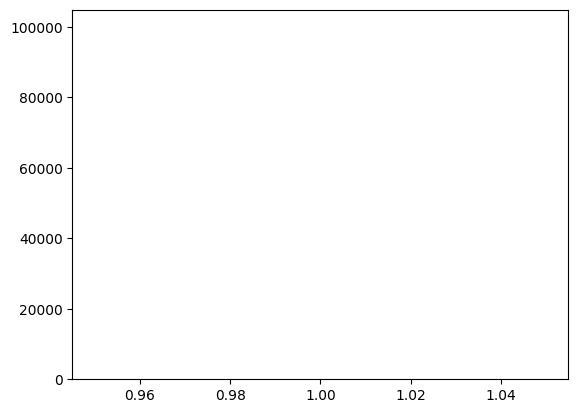

In [ ]:
max_amp = np.max(ppg, axis=1)


(array([    0., 11696.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 99904.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 <BarContainer object of 10 artists>)

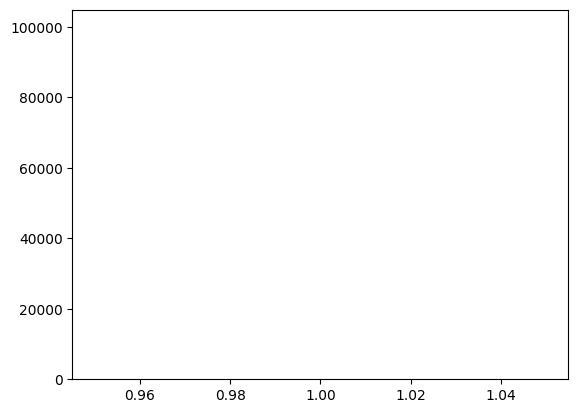

In [63]:
plt.hist(max_amp)

In [65]:
ppg = np.load("../../data/processed/BP_npy/PulseDB/train.npy",mmap_mode='r')[:,1]
len(ppg)

902160

In [ ]:
# importance

In [121]:
import pickle
with open("../../data/results/paper/clf_results_3class_cv_2.pkl", "rb") as f:
    a = pickle.load(f)


In [125]:
a[-1]["feature"][:20].tolist()

['apg_e',
 'SteepDiaRise',
 'TSystoDiaRise',
 'S2_norm',
 'S1_norm',
 'T_peak_e',
 'DW25_norm',
 'SQI_skew',
 'ratio_apg_e',
 'T_e',
 'T_a_norm',
 'T_b',
 'T_d_norm',
 'TSystoDiaRise_norm',
 'Tc',
 'DWdivSW25',
 'S4',
 'T_peak_e_norm',
 'SQI_kurtosis',
 'TdiaRise']

In [122]:
a[-1]["importance_mean"][:20].tolist()

[112566.88583200276,
 108410.5544964403,
 96256.93011779785,
 83952.42340224683,
 83087.30384250582,
 62836.86965325475,
 60705.6182949841,
 60178.74344637394,
 59751.46095811725,
 58752.08854351342,
 57627.49433049261,
 56636.33637729287,
 49141.4773129493,
 48476.3517415911,
 45644.3797234565,
 45451.32271979153,
 43477.932782924174,
 43307.775689029695,
 42267.14945985675,
 41380.479181572795]

In [ ]:
import pickle
with open("../../data/results/paper/clf_results_3class_cv_2.pkl", "rb") as f:
    a = pickle.load(f)


# output proba

In [211]:
import pickle
with open("../../data/results/paper/clf_results_3class_cv_no_downsampled.pkl", "rb") as f:
    a = pickle.load(f)

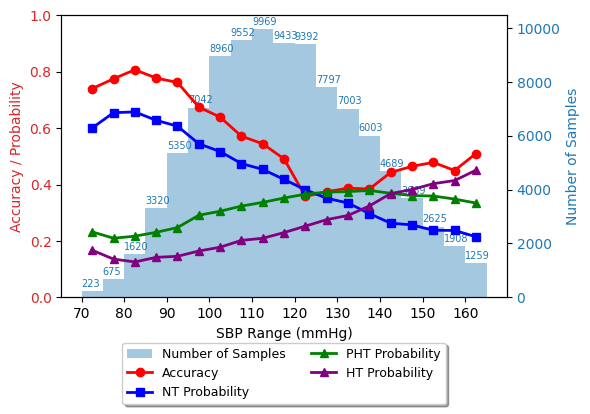

In [212]:
import matplotlib.pyplot as plt
import numpy as np
test_df = pd.read_parquet("../../data/processed/PulseDB/ppg_features_pulsedb_test3_all.parquet")
sbp = test_df['sbp'].values
result1 = a[0]['pred_test_prob']
predicted1 =a[0]['pred_test']  
true = a[0]['true']
bin = np.arange(70, 170, 5)  # SBPの範囲に合わせてビンを設定
length = len(bin)-1
accuracy = np.zeros(length)
num_samples = np.zeros(length)
num_correct = np.zeros(length)
predict_proba_mean_0 = np.zeros(length)
predict_proba_mean_1 = np.zeros(length) 
predict_proba_mean_2 = np.zeros(length) 
for i in range(length):
    idx = (sbp >= bin[i]) & (sbp < bin[i+1])
    accuracy[i] = np.sum(predicted1[idx] == true[idx]) / np.sum(idx)
    num_samples[i] = np.sum(idx)
    num_correct[i] = np.sum(predicted1[idx] == true[idx])
    predict_proba_mean_0[i] = np.mean(result1[idx,0])
    predict_proba_mean_1[i] = np.mean(result1[idx,1])
    predict_proba_mean_2[i] = np.mean(result1[idx,2])
    
fig = plt.figure(figsize=(6, 4.5))
ax2 = fig.add_subplot(111)
# ax1.set_title('SBP Classification Accuracy by Range')
ax2.set_xlabel('SBP Range (mmHg)')
# サンプル数バー
ax1 = ax2.twinx()
# ax2.set_zorder(5)
ax2.patch.set_alpha(0)
ax1.set_zorder(-1)
ax1.set_ylabel('Number of Samples', color='tab:blue')
bars = ax1.bar(bin[:-1], num_samples, width=5, alpha=0.4, color='tab:blue', label='Number of Samples',align='edge')
for i, v in enumerate(num_samples):
    if v > 0:
        ax1.text(bin[i], v + max(num_samples)*0.009, str(int(v)), ha='left', va='bottom', fontsize=7, color='tab:blue', zorder=4)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(bin[::2])

# 右y軸：精度と確率
ax2.set_ylabel('Accuracy / Probability', color='tab:red')

ax2.plot(bin[:-1]+2.5, accuracy, marker='o', color='red', label='Accuracy', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1]+2.5, predict_proba_mean_0, marker='s', color='blue', label='NT Probability', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1]+2.5, predict_proba_mean_1, marker='^', color='green', label='PHT Probability', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1]+2.5, predict_proba_mean_2, marker='^', color='purple', label='HT Probability', linewidth=2, markersize=6, zorder=5)

ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 1.0)  # adjust as needed
# 凡例を下中央に
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=2, fontsize=9, frameon=True, fancybox=True, shadow=True)

fig.tight_layout()
plt.savefig("../../data/results/paper/sbp_classification_accuracy_by_range_no_downsampled.svg", format='svg', dpi=300, bbox_inches='tight')
plt.show()


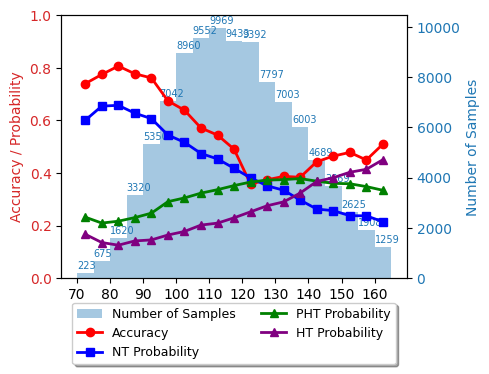

In [213]:
import matplotlib.pyplot as plt
import numpy as np
test_df = pd.read_parquet("../../data/processed/PulseDB/ppg_features_pulsedb_test3_all.parquet")
sbp = test_df['sbp'].values
result1 = a[0]['pred_test_prob']
predicted1 =a[0]['pred_test']  
true = a[0]['true']
bin = np.arange(70, 170, 5)  # SBPの範囲に合わせてビンを設定
length = len(bin)-1
accuracy = np.zeros(length)
num_samples = np.zeros(length)
num_correct = np.zeros(length)
predict_proba_mean_0 = np.zeros(length)
predict_proba_mean_1 = np.zeros(length) 
predict_proba_mean_2 = np.zeros(length) 
for i in range(length):
    idx = (sbp >= bin[i]) & (sbp < bin[i+1])
    accuracy[i] = np.sum(predicted1[idx] == true[idx]) / np.sum(idx)
    num_samples[i] = np.sum(idx)
    num_correct[i] = np.sum(predicted1[idx] == true[idx])
    predict_proba_mean_0[i] = np.mean(result1[idx,0])
    predict_proba_mean_1[i] = np.mean(result1[idx,1])
    predict_proba_mean_2[i] = np.mean(result1[idx,2])
    
fig = plt.figure(figsize=(5, 4))
ax2 = fig.add_subplot(111)
# ax1.set_title('SBP Classification Accuracy by Range')
ax2.set_xlabel('SBP Range (mmHg)')
# サンプル数バー
ax1 = ax2.twinx()
# ax2.set_zorder(5)
ax2.patch.set_alpha(0)
ax1.set_zorder(-1)
ax1.set_ylabel('Number of Samples', color='tab:blue')
bars = ax1.bar(bin[:-1], num_samples, width=5, alpha=0.4, color='tab:blue', label='Number of Samples',align='edge')
for i, v in enumerate(num_samples):
    if v > 0:
        ax1.text(bin[i], v + max(num_samples)*0.009, str(int(v)), ha='left', va='bottom', fontsize=7, color='tab:blue', zorder=4)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(bin[::2])

# 右y軸：精度と確率
ax2.set_ylabel('Accuracy / Probability', color='tab:red')

ax2.plot(bin[:-1]+2.5, accuracy, marker='o', color='red', label='Accuracy', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1]+2.5, predict_proba_mean_0, marker='s', color='blue', label='NT Probability', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1]+2.5, predict_proba_mean_1, marker='^', color='green', label='PHT Probability', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1]+2.5, predict_proba_mean_2, marker='^', color='purple', label='HT Probability', linewidth=2, markersize=6, zorder=5)

ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 1.0)  # adjust as needed
# 凡例を下中央に
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2, fontsize=9, frameon=True, fancybox=True, shadow=True)

fig.tight_layout()
plt.savefig("../../data/results/paper/sbp_classification_accuracy_by_range_no_downsampled.svg", format='svg', dpi=300, bbox_inches='tight')
plt.show()


In [158]:

bin,predict_proba_mean_0,predict_proba_mean_1, predict_proba_mean_2,accuracy

(array([ 70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
        135, 140, 145, 150, 155, 160, 165]),
 array([0.57915332, 0.6416349 , 0.63863117, 0.58975667, 0.56074709,
        0.50917734, 0.47930564, 0.44208753, 0.42823732, 0.399658  ,
        0.36787369, 0.33476097, 0.31509054, 0.27770546, 0.24936682,
        0.23666149, 0.2183078 , 0.21708366, 0.20064123]),
 array([0.23916814, 0.21511989, 0.21892201, 0.24252505, 0.26346906,
        0.2984289 , 0.31260004, 0.32792909, 0.33728896, 0.34757117,
        0.35931012, 0.36700639, 0.36875073, 0.37526409, 0.37011778,
        0.36264745, 0.3628283 , 0.35382641, 0.3426529 ]),
 array([0.18167854, 0.14324521, 0.14244682, 0.16771827, 0.17578386,
        0.19239376, 0.20809432, 0.22998338, 0.23447371, 0.25277083,
        0.27281619, 0.29823265, 0.31615873, 0.34703045, 0.3805154 ,
        0.40069106, 0.4188639 , 0.42908993, 0.45670588]),
 array([0.72197309, 0.77481481, 0.81358025, 0.78072289, 0.76018692,
        0.66060778, 0.617857

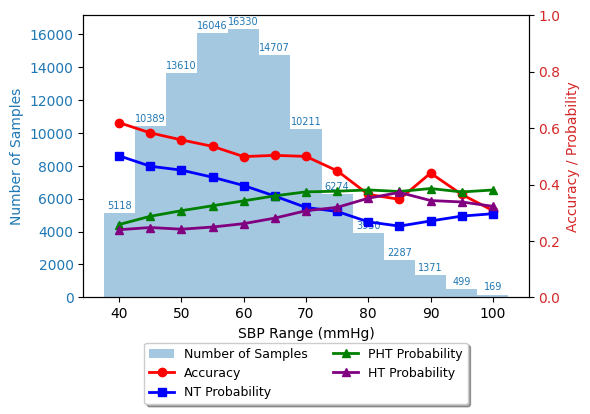

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
test_df = pd.read_parquet("../../data/processed/PulseDB/ppg_features_pulsedb_test3_all.parquet")
sbp = test_df['dbp'].values
result1 = a[1]['pred_test_prob']
predicted1 =a[0]['pred_test']  
true = a[0]['true']
bin = np.arange(40, 110, 5)  # DBPの範囲に合わせてビンを設定
length = len(bin)-1
accuracy = np.zeros(length)
num_samples = np.zeros(length)
num_correct = np.zeros(length)
predict_proba_mean_0 = np.zeros(length)
predict_proba_mean_1 = np.zeros(length) 
predict_proba_mean_2 = np.zeros(length) 
for i in range(length):
    idx = (sbp >= bin[i]) & (sbp < bin[i+1])
    accuracy[i] = np.sum(predicted1[idx] == true[idx]) / np.sum(idx)
    num_samples[i] = np.sum(idx)
    num_correct[i] = np.sum(predicted1[idx] == true[idx])
    predict_proba_mean_0[i] = np.mean(result1[idx,0])
    predict_proba_mean_1[i] = np.mean(result1[idx,1])
    predict_proba_mean_2[i] = np.mean(result1[idx,2])
    
fig = plt.figure(figsize=(6, 4.5))
ax1 = fig.add_subplot(111)
# ax1.set_title('SBP Classification Accuracy by Range')
ax1.set_xlabel('SBP Range (mmHg)')
ax1.set_ylabel('Number of Samples', color='tab:blue')
# サンプル数バー
bars = ax1.bar(bin[:-1], num_samples, width=5, alpha=0.4, color='tab:blue', label='Number of Samples', zorder=2)
for i, v in enumerate(num_samples):
    if v > 0:
        ax1.text(bin[i], v + max(num_samples)*0.009, str(int(v)), ha='center', va='bottom', fontsize=7, color='tab:blue', zorder=4)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(bin[::2])

# No data区間（例: bin 100〜140までデータなし）
# no_data_start = 97.5
# no_data_end = 137.5
# ax1.axvspan(no_data_start, no_data_end, color='gray', alpha=0.4, zorder=1)

# 「No data」テキストを区間中央だけに表示
# ax1.text((no_data_start+no_data_end)/2, ax1.get_ylim()[1]*0.5, 'No data',
#          ha='center', va='center', fontsize=14, color='white', weight='bold', zorder=10, rotation=90)

# 右y軸：精度と確率
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy / Probability', color='tab:red')

ax2.plot(bin[:-1], accuracy, marker='o', color='red', label='Accuracy', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1], predict_proba_mean_0, marker='s', color='blue', label='NT Probability', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1], predict_proba_mean_1, marker='^', color='green', label='PHT Probability', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1], predict_proba_mean_2, marker='^', color='purple', label='HT Probability', linewidth=2, markersize=6, zorder=5)

ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 1.0)  # adjust as needed

# 凡例を下中央に
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=2, fontsize=9, frameon=True, fancybox=True, shadow=True)

fig.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [176]:
sig = np.load(r"../../data/processed/BP_npy/PulseDB/test_raw.npy")

In [177]:
sig.shape

(111600, 2, 1250)

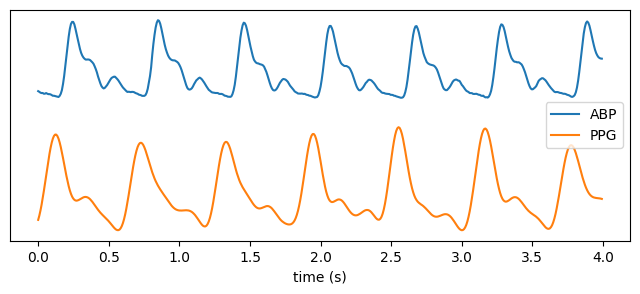

In [205]:
index = 300
length = 500
plt.figure(figsize=(8,3))
plt.plot(np.arange(0,length)/125,sig[index,0,500:500+length].transpose()/np.max(sig[10,0,500:700])*1.2+0.7,label="ABP")
plt.plot(np.arange(0,length)/125,sig[index,1,500:500+length].transpose(),label="PPG")
plt.legend()
# off x axis
plt.gca().yaxis.set_visible(False)
plt.xticks()
plt.xlabel("time (s)")
# print(np.arange(0,length+1)/125)
plt.show()

# 2

In [221]:
import pickle
with open("../../data/results/paper/clf_results_3class_cv_downsampled.pkl", "rb") as f:
    a = pickle.load(f)

In [228]:
for i in range(5):
    print(a[i]['pred_test_prob'][10:20])

[[0.37970877 0.42343494 0.1968563 ]
 [0.92257346 0.06095282 0.01647371]
 [0.9099966  0.07644995 0.01355345]
 [0.65823654 0.28886145 0.052902  ]
 [0.26263092 0.49725219 0.2401169 ]
 [0.70829274 0.23318939 0.05851788]
 [0.39293157 0.49250291 0.11456553]
 [0.7744585  0.16153322 0.06400829]
 [0.69174377 0.10321156 0.20504467]
 [0.64011952 0.22455043 0.13533005]]
[[0.30736418 0.48027421 0.21236161]
 [0.89966824 0.07570497 0.02462678]
 [0.91037532 0.07405572 0.01556896]
 [0.56500053 0.36252851 0.07247095]
 [0.29073227 0.55965152 0.14961621]
 [0.66113076 0.22028734 0.1185819 ]
 [0.49177972 0.34961567 0.15860461]
 [0.78362826 0.1627918  0.05357994]
 [0.73901161 0.13756165 0.12342674]
 [0.74644158 0.13908859 0.11446984]]
[[0.32763219 0.48893586 0.18343195]
 [0.91318392 0.07348173 0.01333435]
 [0.91230693 0.07628315 0.01140991]
 [0.64001887 0.32791427 0.03206686]
 [0.31750535 0.57170706 0.1107876 ]
 [0.72718907 0.21931047 0.05350045]
 [0.40762072 0.51736341 0.07501587]
 [0.79860792 0.15916738 0.

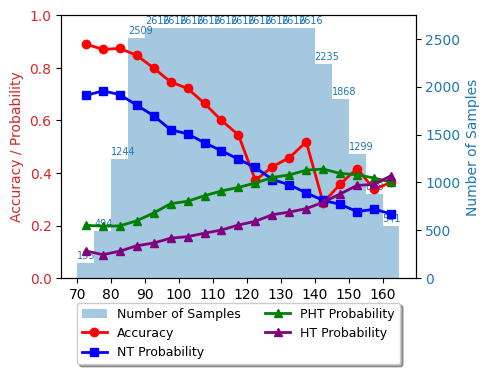

In [229]:
import matplotlib.pyplot as plt
import numpy as np
test_df = pd.read_parquet("../../data/processed/PulseDB/Downsampled/test_features3.parquet")
sbp = test_df['sbp'].values
result1 = a[3]['pred_test_prob']
predicted1 =a[3]['pred_test']  
true = a[3]['true']
bin = np.arange(70, 170, 5)  # SBPの範囲に合わせてビンを設定
length = len(bin)-1
accuracy = np.zeros(length)
num_samples = np.zeros(length)
num_correct = np.zeros(length)
predict_proba_mean_0 = np.zeros(length)
predict_proba_mean_1 = np.zeros(length) 
predict_proba_mean_2 = np.zeros(length) 
for i in range(length):
    idx = (sbp >= bin[i]) & (sbp < bin[i+1])
    accuracy[i] = np.sum(predicted1[idx] == true[idx]) / np.sum(idx)
    num_samples[i] = np.sum(idx)
    num_correct[i] = np.sum(predicted1[idx] == true[idx])
    predict_proba_mean_0[i] = np.mean(result1[idx,0])
    predict_proba_mean_1[i] = np.mean(result1[idx,1])
    predict_proba_mean_2[i] = np.mean(result1[idx,2])
    
fig = plt.figure(figsize=(5, 4))
ax2 = fig.add_subplot(111)
# ax1.set_title('SBP Classification Accuracy by Range')
ax2.set_xlabel('SBP Range (mmHg)')
# サンプル数バー
ax1 = ax2.twinx()
# ax2.set_zorder(5)
ax2.patch.set_alpha(0)
ax1.set_zorder(-1)
ax1.set_ylabel('Number of Samples', color='tab:blue')
bars = ax1.bar(bin[:-1], num_samples, width=5, alpha=0.4, color='tab:blue', label='Number of Samples',align='edge')
for i, v in enumerate(num_samples):
    if v > 0:
        ax1.text(bin[i], v + max(num_samples)*0.009, str(int(v)), ha='left', va='bottom', fontsize=7, color='tab:blue', zorder=4)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(bin[::2])

# 右y軸：精度と確率
ax2.set_ylabel('Accuracy / Probability', color='tab:red')

ax2.plot(bin[:-1]+2.5, accuracy, marker='o', color='red', label='Accuracy', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1]+2.5, predict_proba_mean_0, marker='s', color='blue', label='NT Probability', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1]+2.5, predict_proba_mean_1, marker='^', color='green', label='PHT Probability', linewidth=2, markersize=6, zorder=5)
ax2.plot(bin[:-1]+2.5, predict_proba_mean_2, marker='^', color='purple', label='HT Probability', linewidth=2, markersize=6, zorder=5)

ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 1.0)  # adjust as needed
# 凡例を下中央に
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2, fontsize=9, frameon=True, fancybox=True, shadow=True)

fig.tight_layout()
plt.savefig("../../data/results/paper/sbp_classification_accuracy_by_range_downsampled.svg", format='svg', dpi=300, bbox_inches='tight')
plt.show()


# 箱ひげ図 (test)

In [230]:
test_df = pd.read_parquet(r'F:\minowa\BloodPressureEstimation\data\processed\PulseDB\ppg_features_pulsedb_test3_all.parquet')

In [231]:
test_df = add_bp_class(test_df)

In [251]:
data[0]

[array([0.118     , 0.10457143, 0.11466667, ..., 0.12342857, 0.119     ,
        0.11542857]),
 array([0.10914286, 0.10971429, 0.11253333, ..., 0.11314286, 0.11542857,
        0.124     ]),
 array([0.1232    , 0.11466667, 0.10986667, ..., 0.11771429, 0.11542857,
        0.11657143])]

In [248]:
from scipy.stats import levene

T_b


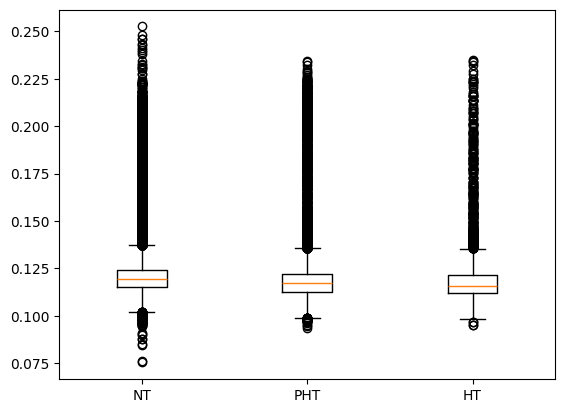

NT 0.12114243372437516 0.0113159026233359
PHT 0.11921599577102922 0.012750624511631893
HT 0.11786439807249688 0.011133874914477827
p: 7.128657720505468e-06
ratio_apg_b


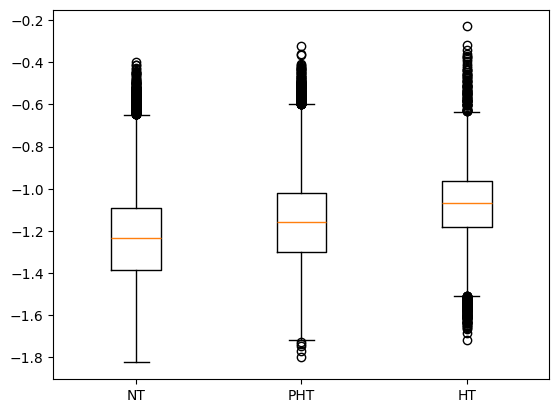

NT -1.2335334957430661 0.20951075307308717
PHT -1.1595936946082483 0.2067202032761119
HT -1.0765131603734674 0.1827223946967773
p: 3.5940905473588656e-114
Td


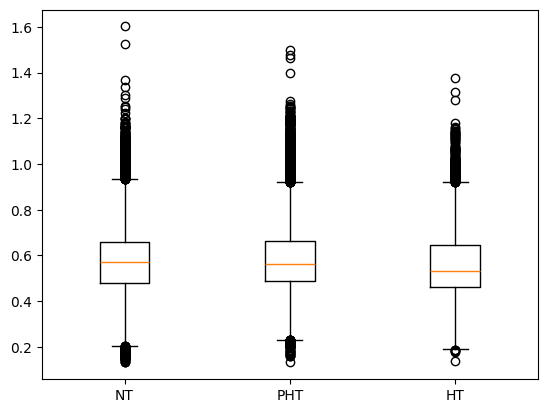

NT 0.5700481997084671 0.15108142071598918
PHT 0.5855531982567312 0.14008727809811977
HT 0.5595526709651132 0.1378678067080418
p: 1.1008349199438962e-50
SQI_skew


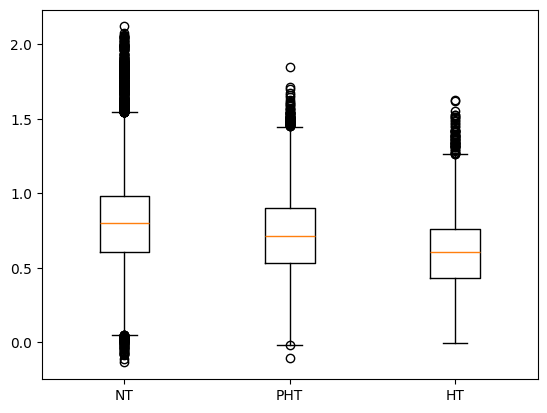

NT 0.7917055429123683 0.2901955305217416
PHT 0.7203513525066896 0.2631956975123191
HT 0.6067547802540576 0.2311587026994864
p: 1.990469308389325e-134
TSystoDiaRise


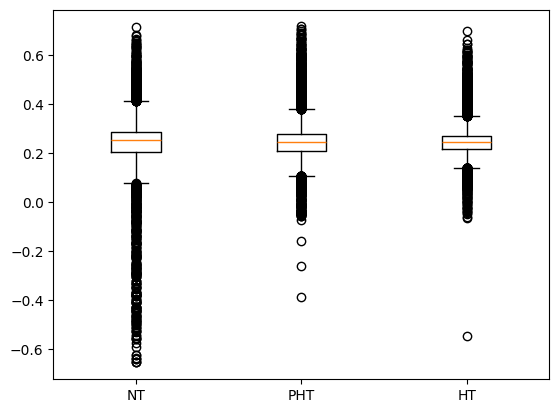

NT 0.24194416497571133 0.080085660371119
PHT 0.23840712766911018 0.06774372115564671
HT 0.24382894622530002 0.06665528964533679
p: 1.1985399287153096e-162


In [259]:
labels = ["NT","PHT","HT"]
features = ['T_b',"ratio_apg_b","Td","SQI_skew","TSystoDiaRise"]
for f in features:
    print(f)
    data = [list(test_df[test_df['bp_class'] == i][f].dropna().values for i in range(3))][0]
    plt.boxplot(data, labels=labels)
    plt.show()
    for i, label in enumerate(labels):
        vals = test_df[test_df['bp_class'] == i][f]
        print(label, np.mean(vals), np.std(vals))
    stat, p = levene(
        data[0],  # NT
        data[1],  # PHT
        data[2],  # HT
        center='median'  # ← 超重要（外れ値に強い）
    )
    print("p:",p)

In [241]:
for i, label in enumerate(labels):
    vals = test_df[test_df['bp_class'] == i]['T_b']
    print(label, len(vals), vals.isna().sum())

NT 55853 13
PHT 34344 0
HT 12699 1


NT 0.12114243372437516 0.0113159026233359
PHT 0.11921599577102922 0.012750624511631893
HT 0.11786439807249688 0.011133874914477827


In [ ]:
from scipy.stats import levene



7.128657720505468e-06


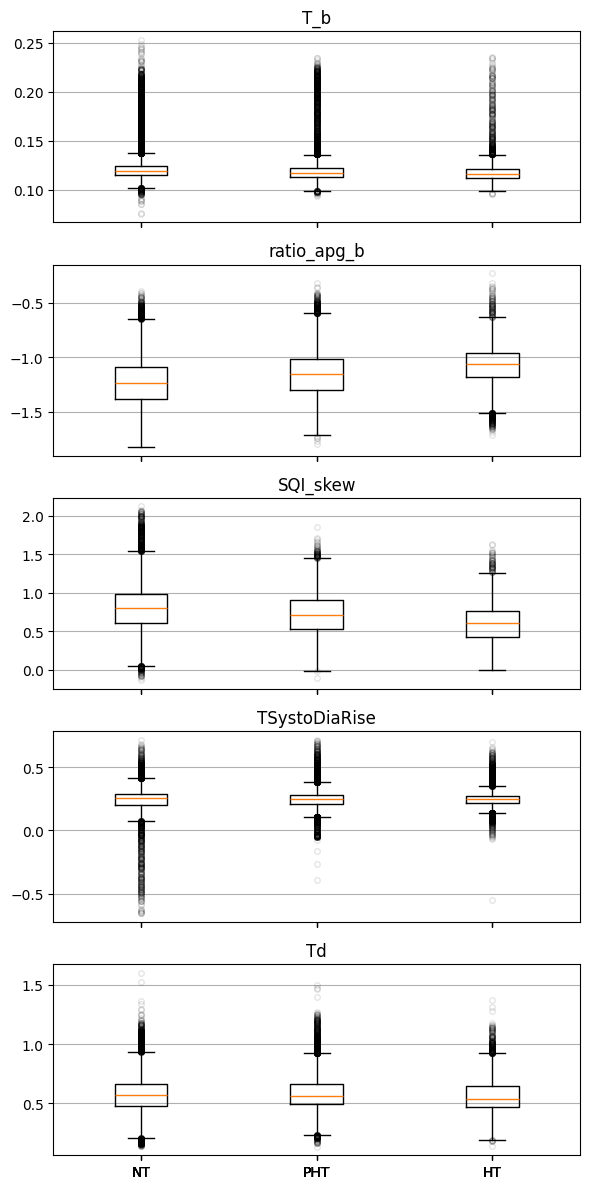

In [273]:
import matplotlib.pyplot as plt

labels = ["NT", "PHT", "HT"]
features = ['T_b', "ratio_apg_b", "SQI_skew", "TSystoDiaRise","Td"]

fig, axes = plt.subplots(len(features), 1, figsize=(6, 12), sharex=True)

for ax, f in zip(axes, features):
    data = [
        test_df[test_df['bp_class'] == i][f].dropna().values
        for i in range(3)
    ]
    ax.boxplot(data, labels=labels,
                   flierprops=dict(
        marker='o',
        markerfacecolor='none',
        markeredgecolor='black',
        alpha=0.1,      # ← ここで透明度
        markersize=4
    ))
    ax.set_title(f)
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


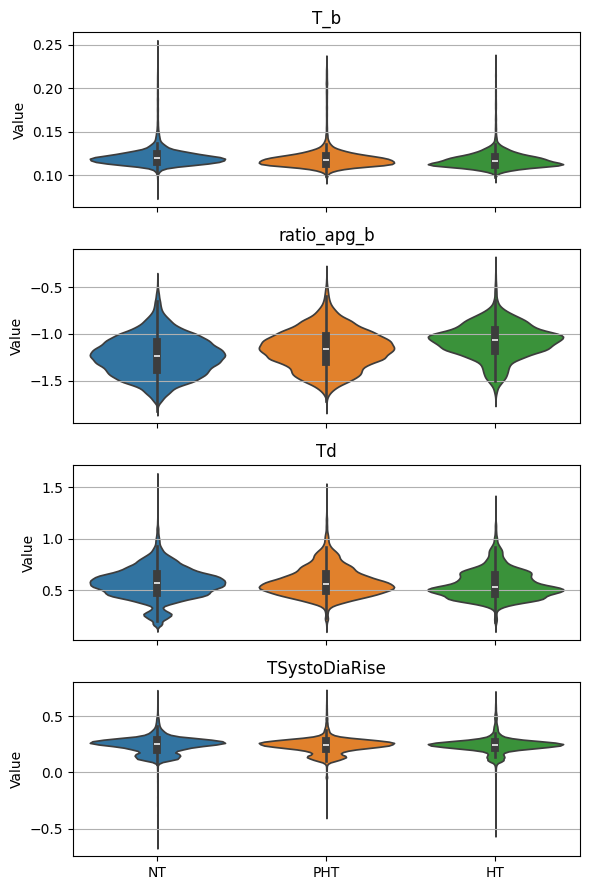

In [276]:
import seaborn as sns

labels = ["NT", "PHT", "HT"]
features = ['T_b', "ratio_apg_b", "Td", "TSystoDiaRise"]

fig, axes = plt.subplots(len(features), 1, figsize=(6, 9), sharex=True)

for ax, f in zip(axes, features):
    data = [
        test_df[test_df['bp_class'] == i][f].dropna().values
        for i in range(3)
    ]
    
    parts = sns.violinplot(
        data,
        ax=ax
    )
    
    ax.set_title(f)
    ax.set_ylabel("Value")
    ax.grid(True, axis='y')

axes[-1].set_xticks([0,1,2])
axes[-1].set_xticklabels(labels)

plt.tight_layout()
plt.show()
